In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.info())
# print(train.head())
# print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Alley

In [25]:
from pandas.api.types import is_numeric_dtype

def check_feature_influence(df, feature):
    filtered_df = df[[feature, "SalePrice"]]
    filtered_df = filtered_df.dropna()
    plt.figure(figsize=(8, 6))
    if is_numeric_dtype(filtered_df[feature]):
        sns.scatterplot(filtered_df, x="SalePrice", y=feature)
        correlation = filtered_df["SalePrice"].corr(filtered_df[feature], method='spearman')
        print(f"Spearman Correlation: {correlation}")
    else:
        sns.boxplot(x='SalePrice', y=feature, data=filtered_df)

    # Add labels and title
    plt.title(f"Group difference of {feature} to SalePrice ({filtered_df.shape[0]}/{df.shape[0]})")
    plt.xlabel("SalePrice")
    plt.ylabel(feature)

    # Show the plot
    plt.show()

Spearman Correlation: 0.4090755179546496


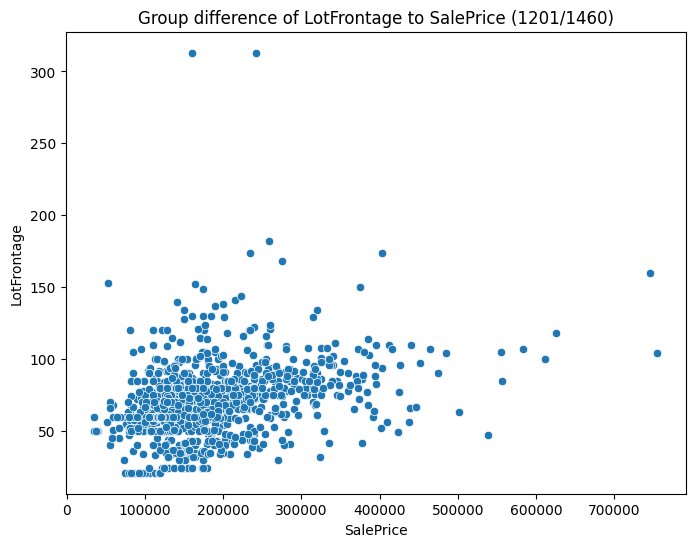

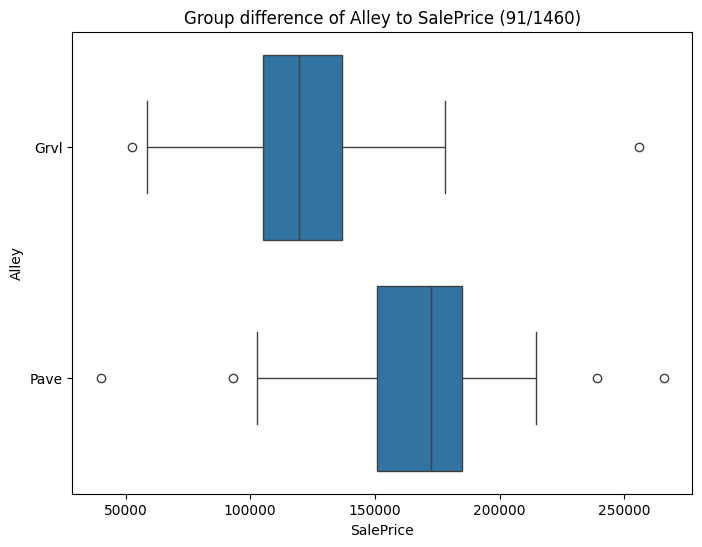

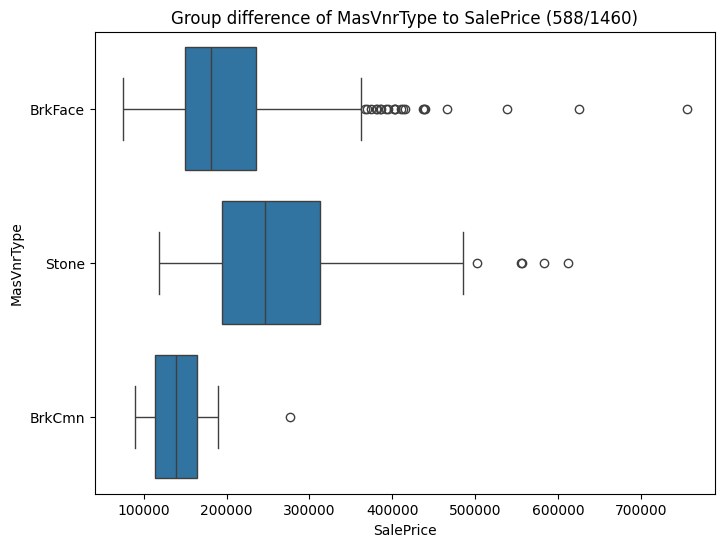

Spearman Correlation: 0.4213094993288471


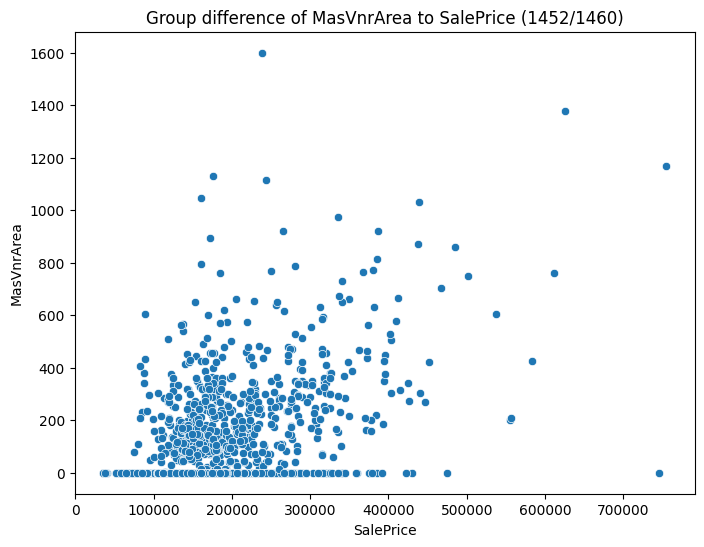

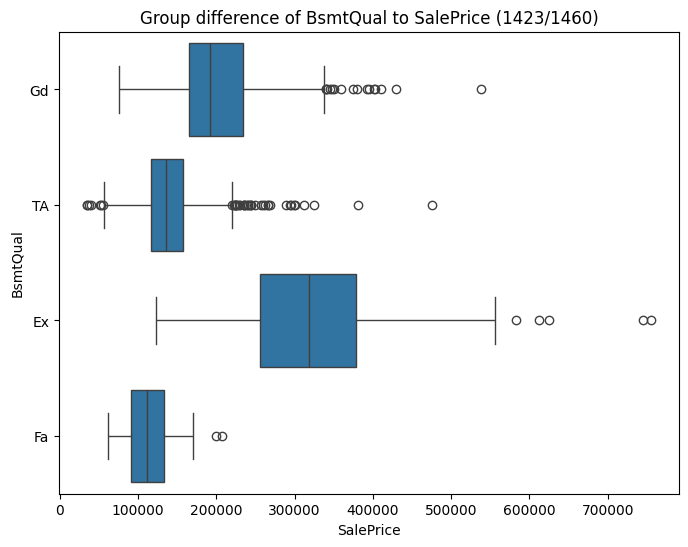

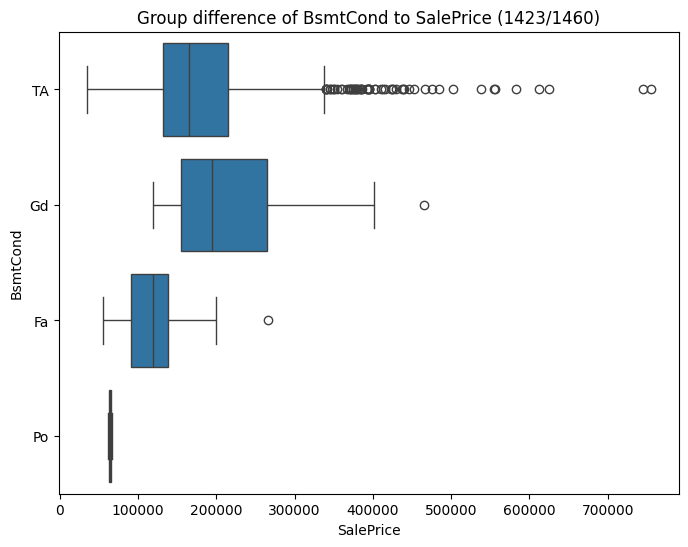

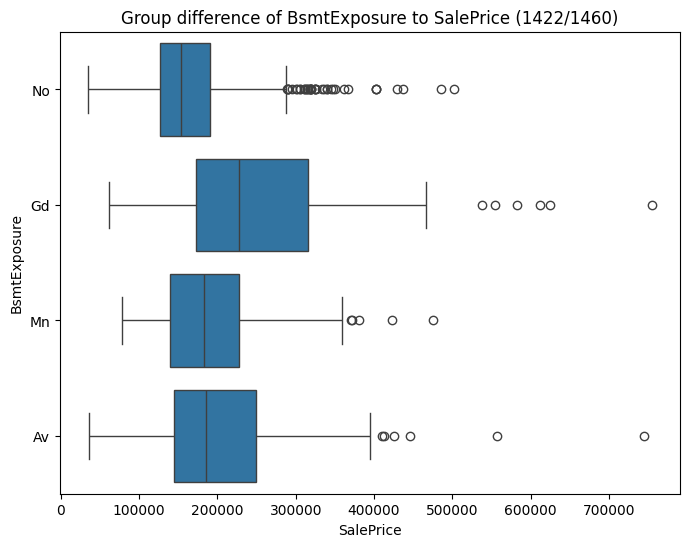

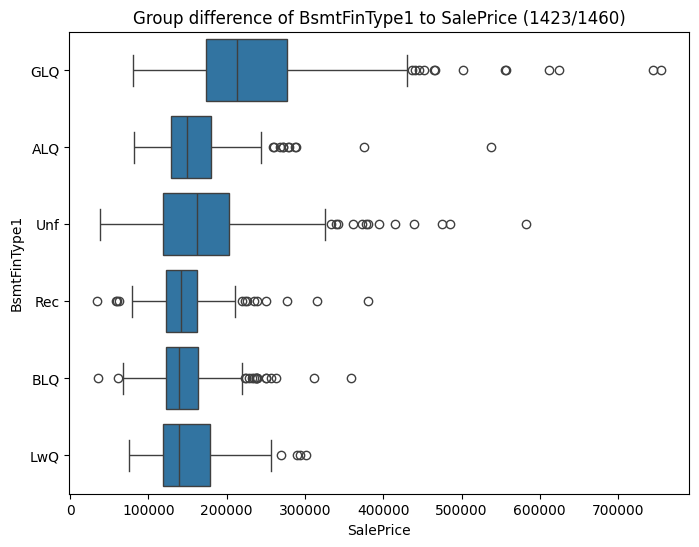

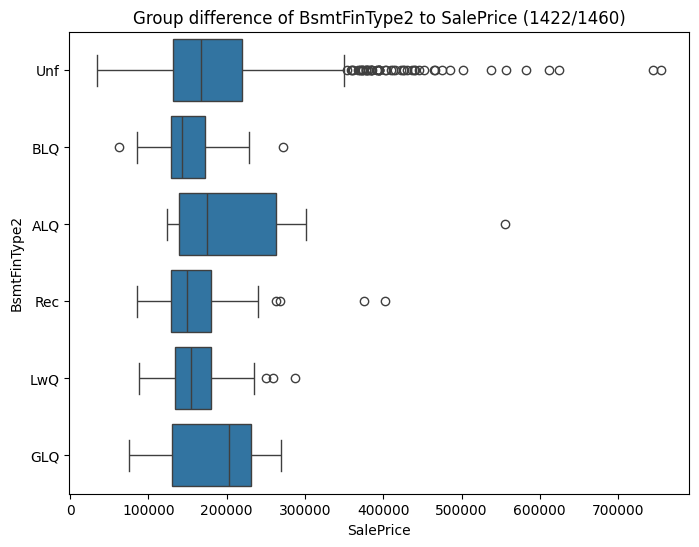

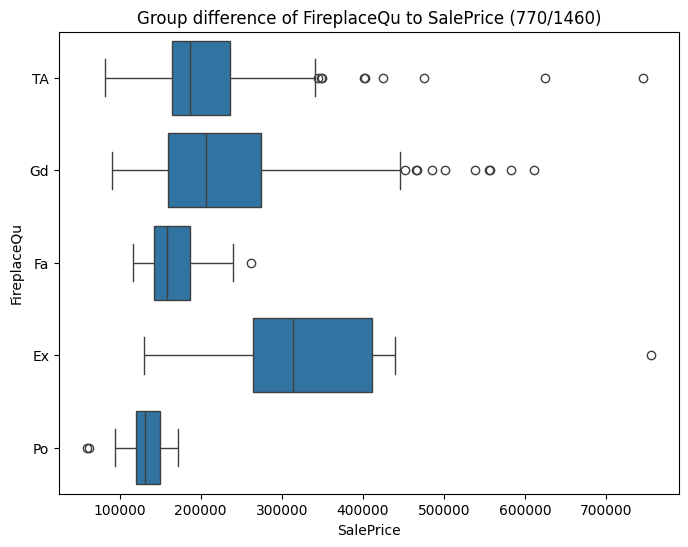

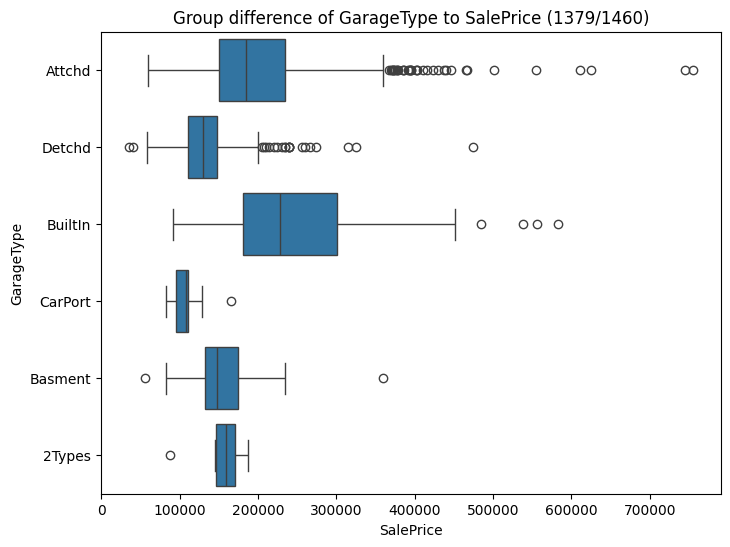

Spearman Correlation: 0.5937883261958506


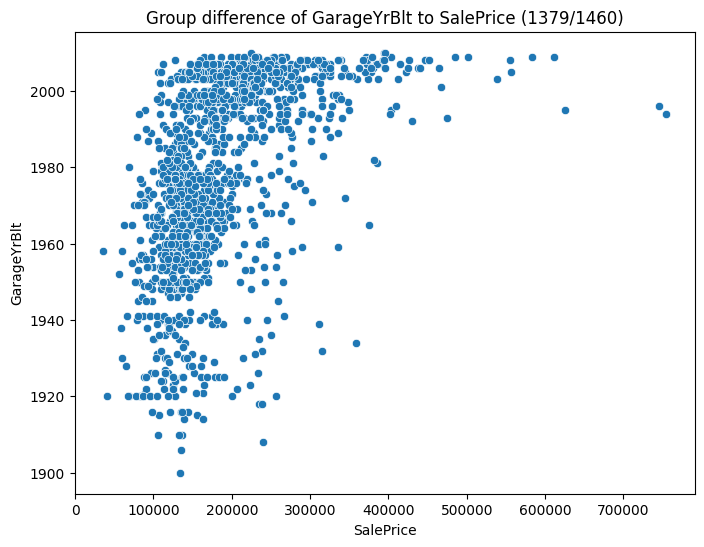

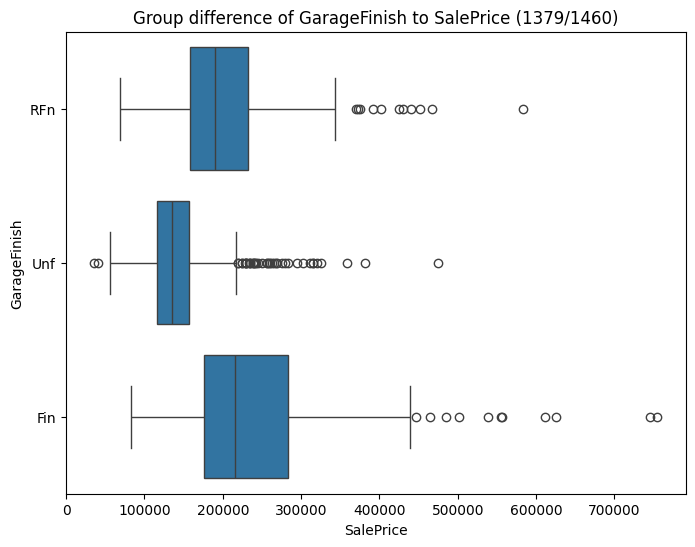

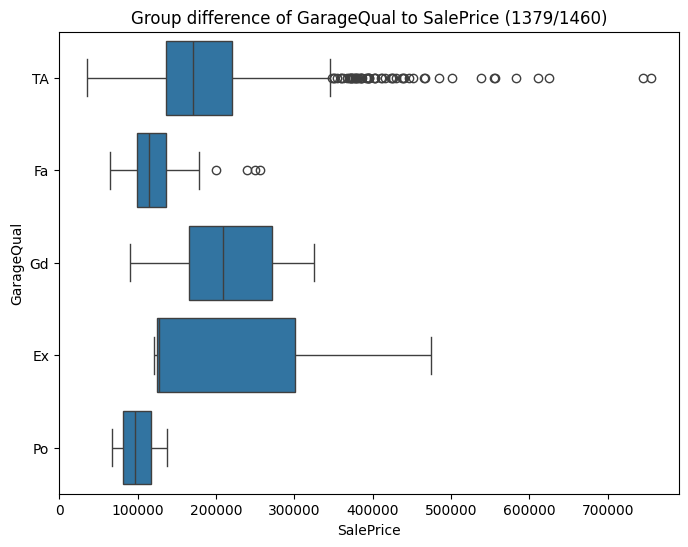

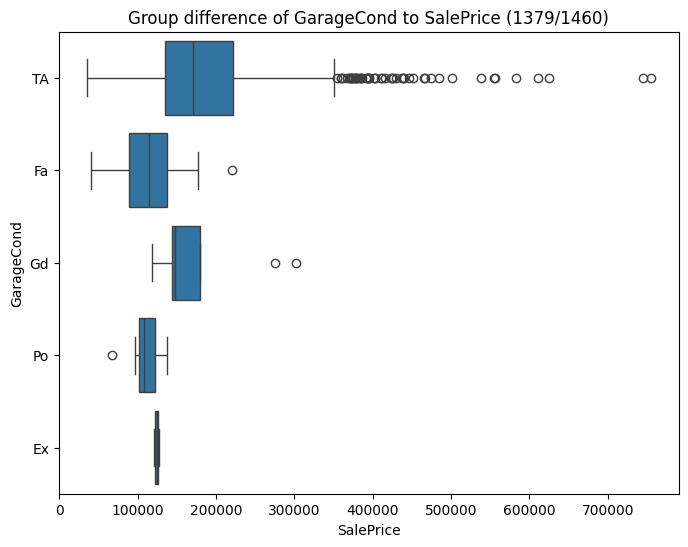

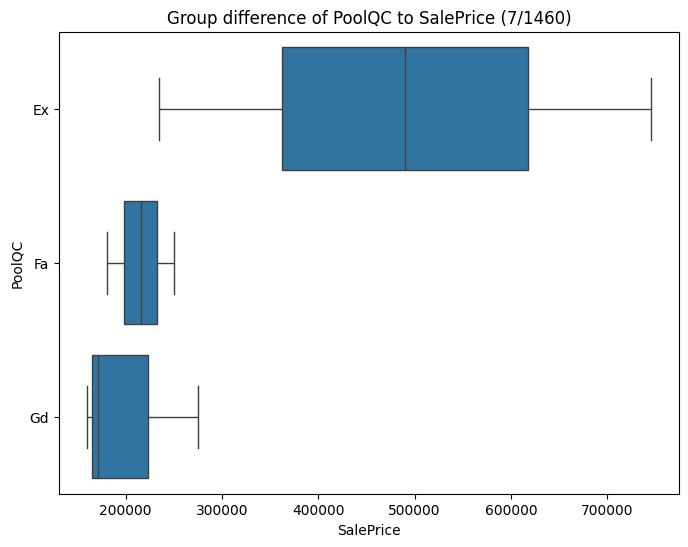

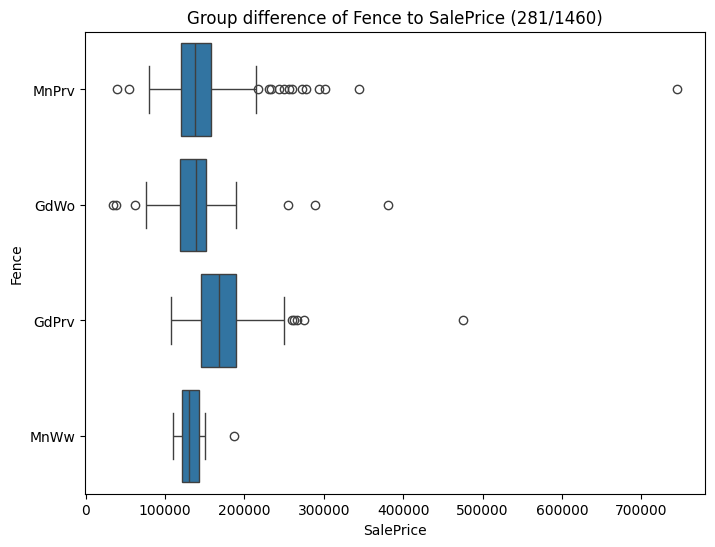

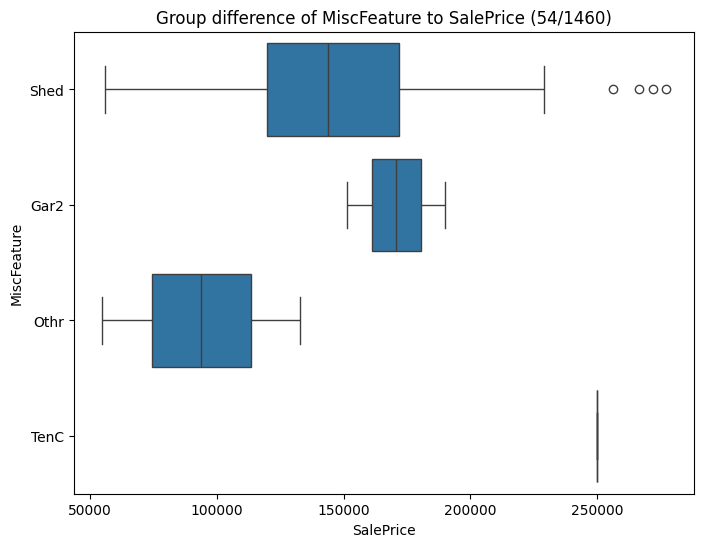

In [26]:
non_complete_cols = ["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for col in non_complete_cols:
    check_feature_influence(train, col)